In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/car data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
rs = RobustScaler()
sc = StandardScaler()

In [ ]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
df.Fuel_Type = label.fit_transform(df.Fuel_Type)
df.Seller_Type = label.fit_transform(df.Seller_Type)
df.Transmission = label.fit_transform(df.Transmission)

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
1    261
0     40
Name: Transmission, dtype: int64


In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
x = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [ ]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [ ]:
x.shape

(301, 7)

In [ ]:
x.dtypes

Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int64
Seller_Type        int64
Transmission       int64
Owner              int64
dtype: object

In [ ]:
x.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [ ]:
y.shape

(301,)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,2,0,1,0
249,2016,7.600,17000,2,0,1,0
277,2015,13.600,21780,2,0,1,0
194,2008,0.787,50000,2,1,1,0
244,2013,9.400,49000,1,0,1,0


In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


Linear Regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_train_predict = model.predict(X_train)

In [ ]:
score_1 = metrics.r2_score(y_train,X_train_predict)
print("R2=",score_1)

R2= 0.8799451660493713


In [ ]:
score_2 = metrics.mean_absolute_error(y_train,X_train_predict)
print("Mean Absolute = ",score_2)

Mean Absolute =  1.2166174093911244


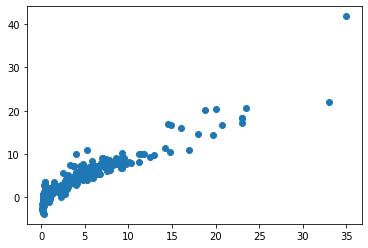

In [ ]:
plt.scatter(y_train,X_train_predict)
plt.show()

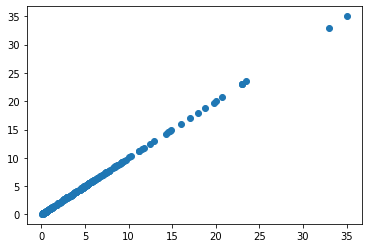

In [ ]:
plt.scatter(y_train,y_train)
plt.show()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
score_1 = metrics.r2_score(y_test,y_predict)
print("R2=",score_1)

R2= 0.8365766715027033


In [ ]:
score_2 = metrics.mean_absolute_error(y_test,y_predict)
print("Mean Absolute = ",score_2)

Mean Absolute =  1.1516382156613745


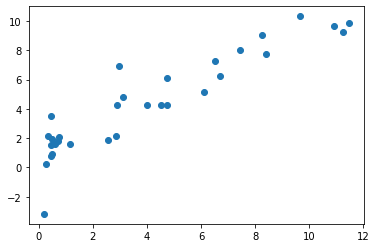

In [ ]:
plt.scatter(y_test,y_predict)
plt.show()

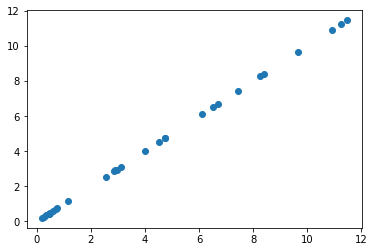

In [ ]:
plt.scatter(y_test,y_test)
plt.show()

Lasso Regression

In [ ]:
Lasso_model = Lasso()

In [ ]:
Lasso_model.fit(X_train,y_train)

Lasso()

In [ ]:
X_train_predict = Lasso_model.predict(X_train)

In [ ]:
score_1 = metrics.r2_score(y_train,X_train_predict)
print("R2=",score_1)

R2= 0.8427856123435794


In [ ]:
score_2 = metrics.mean_absolute_error(y_train,X_train_predict)
print("Mean Absolute = ",score_2)

Mean Absolute =  1.2863097696916528


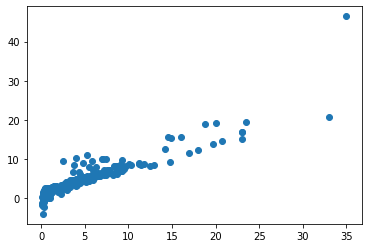

In [ ]:
plt.scatter(y_train,X_train_predict)
plt.show()

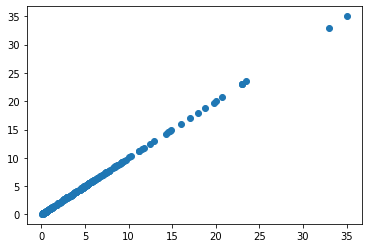

In [ ]:
plt.scatter(y_train,y_train)
plt.show()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
score_1 = metrics.r2_score(y_test,y_predict)
print("R2=",score_1)

R2= 0.8365766715027033


In [ ]:
score_2 = metrics.mean_absolute_error(y_test,y_predict)
print("Mean Absolute = ",score_2)

Mean Absolute =  1.1516382156613745


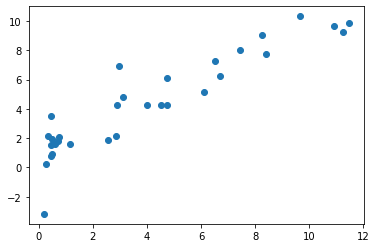

In [ ]:
plt.scatter(y_test,y_predict)
plt.show()

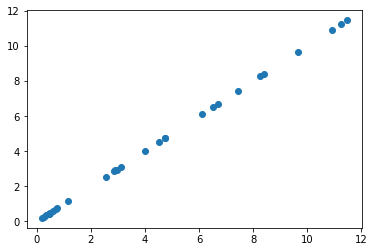

In [ ]:
plt.scatter(y_test,y_test)
plt.show()

SVC

In [ ]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf',)